<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/DeepNN_MNIST_Lab15_BJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt

@ dataset

In [18]:
mnist=tf.keras.datasets.mnist

In [19]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
x_test.shape

(10000, 28, 28)

In [22]:
y_train.shape

(60000,)

In [23]:
y_test.shape

(10000,)

In [24]:
x_train=x_train/255.0
x_test=x_test/255.0

In [25]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<function matplotlib.pyplot.show>

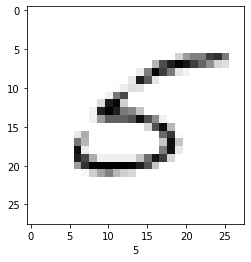

In [26]:
i=59993
plt.imshow(x_train[i],cmap=plt.cm.binary)
plt.xlabel(y_train[i])
plt.show

In [27]:
y_train[0]

5

#Sequential

In [309]:
initializer=tf.keras.initializers.HeNormal()

In [310]:
activation=tf.keras.activations.relu

In [311]:
learning_rate=1e-2

In [312]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # Flatten 한줄로 줄세우기

model.add(tf.keras.layers.Dense(128,activation=activation,kernel_initializer=initializer)) # Hidden layer
model.add(tf.keras.layers.Dense(128,activation=activation,kernel_initializer=initializer)) # Hidden layer
model.add(tf.keras.layers.Dense(128,activation=activation,kernel_initializer=initializer)) # Hidden layer
model.add(tf.keras.layers.Dense(128,activation=activation,kernel_initializer=initializer)) # Hidden layer

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10,activation='softmax',kernel_initializer=initializer)) # Output(숫자 10개)

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_147 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_148 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_149 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_150 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_151 (Dense)            (None, 10)              

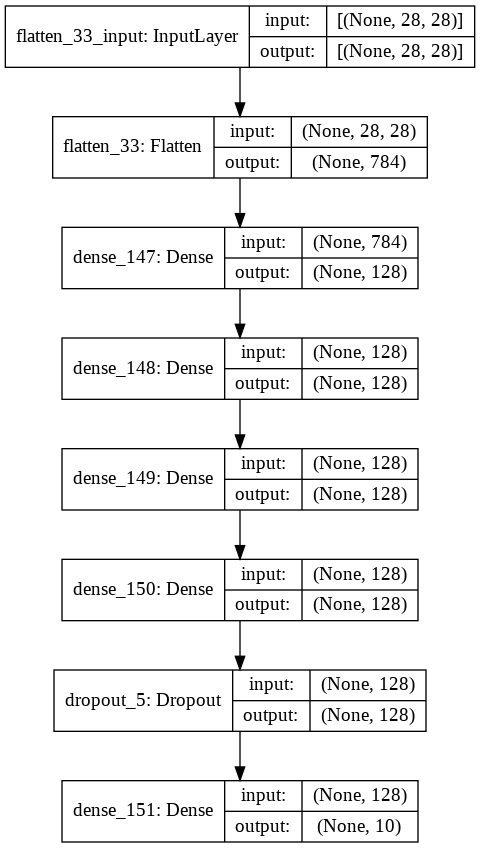

In [313]:
model.summary()
tf.keras.utils.plot_model(model,show_shapes='true')

In [314]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Onehot 인코딩을 안했으면 Sparse를 써야함
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [315]:
model.fit(x_train,y_train,batch_size=128,epochs=1) # 32개로 나누어서 60000개 계산

469/469 [==============================] - 3s 5ms/step - loss: 0.5752 - sparse_categorical_accuracy: 0.8242


In [316]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2307 - sparse_categorical_accuracy: 0.9366


[0.23065771162509918, 0.9366000294685364]

In [317]:
model.weights

[<tf.Variable 'dense_147/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.00113106, -0.02156122, -0.06176845, ..., -0.02080256,
          0.02051338, -0.00402093],
        [-0.01107919, -0.04934683,  0.05614335, ..., -0.00329218,
         -0.02543413,  0.05276842],
        [ 0.06627907,  0.02004673, -0.01246781, ...,  0.02095988,
         -0.09180363,  0.06669045],
        ...,
        [ 0.01212486, -0.00403336, -0.09501507, ..., -0.00694229,
          0.05478442,  0.00280118],
        [-0.06568037, -0.03541027, -0.03312237, ...,  0.01176407,
         -0.03696239, -0.01256982],
        [-0.02195129, -0.06799512, -0.02214748, ...,  0.08205827,
         -0.0891958 , -0.04376459]], dtype=float32)>,
 <tf.Variable 'dense_147/bias:0' shape=(128,) dtype=float32, numpy=
 array([-0.06194992, -0.09311885, -0.05823114, -0.08440255,  0.02760914,
         0.05485378,  0.00058393, -0.03598888, -0.00136328, -0.05357247,
        -0.05812164,  0.0790607 , -0.0271023 , -0.04445149, -0.075729